In [1]:
import json
from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
IPythonConsole.molSize = 300,300

sns.set_context("talk")
mpl.rcParams['font.sans-serif'] = ["muli"]

%matplotlib inline

In [2]:
with open("components.json", "r") as f:
    components = json.load(f)

In [3]:
component_counter = Counter()
for groups in components.values():
    for group in groups:
        component_counter[group] += 1

In [4]:
ignore = [
    "Hydroxy", "Aqueous",
    "Primary Aliphatic Amine", "Primary Aromatic Amine",
    "Secondary Aliphatic Amine", "Secondary Aromatic Amine",
    "Tertiary Aliphatic Amine", "Tertiary Aromatic Amine",
]

In [6]:
len(components)

127

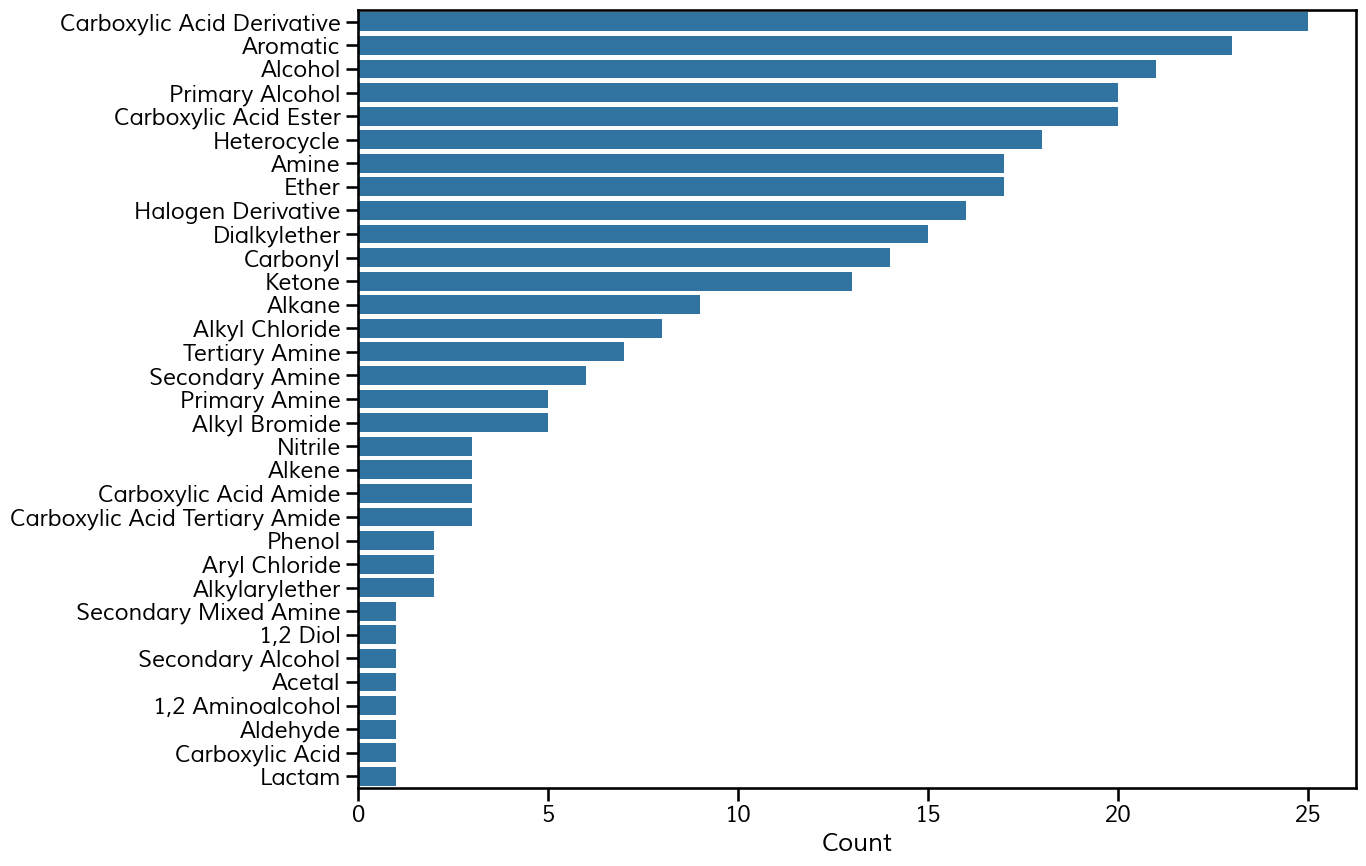

In [5]:
fig, ax = plt.subplots(figsize=(14, 9))
ax = sns.barplot(
    {
        k: v
        for k, v in component_counter.most_common()
        if k not in ignore
    },
    orient="y"
)
ax.set_xlabel("Count")
plt.tight_layout()
plt.savefig("components.png", dpi=300)

In [13]:
with open("component_counts.json", "w") as f:
    json.dump(component_counter, f)

In [14]:
with open("/Users/lily/pydev/openff-sage/data-set-curation/physical-property/optimizations/data-sets/chemical-groups/component_counts.json", "r") as f:
    old_component_counter = json.load(f)

In [24]:
with open("/Users/lily/pydev/openff-sage/data-set-curation/physical-property/optimizations/data-sets/chemical-groups/components.json", "r") as f:
    old_components = json.load(f)

In [15]:
len(old_component_counter)

38

In [16]:
len(component_counter)

39

In [25]:
added_smiles = set(components) - set(old_components)
added_smiles

{'BrCCCCCCBr',
 'C1CCOC1',
 'CC#N',
 'CC(=O)O',
 'CCC#N',
 'CCC(=O)CC',
 'CCCC#N',
 'CCCC(=O)OCC',
 'CCCCCCCCCl',
 'CCCCCCN',
 'CCCCN',
 'CCCCOC(=O)CC',
 'CCCCOC=O',
 'CCCOC(=O)CCC',
 'CCOC(=O)C(C)C',
 'CCOC(=O)CC',
 'CCOC(=O)CC(C)=O',
 'COCCO',
 'COCCOCCO',
 'COCCOCCOC',
 'Cc1cccc(O)c1',
 'Cc1ccccc1O',
 'ClC(Cl)Cl',
 'ClCCCCCCl'}

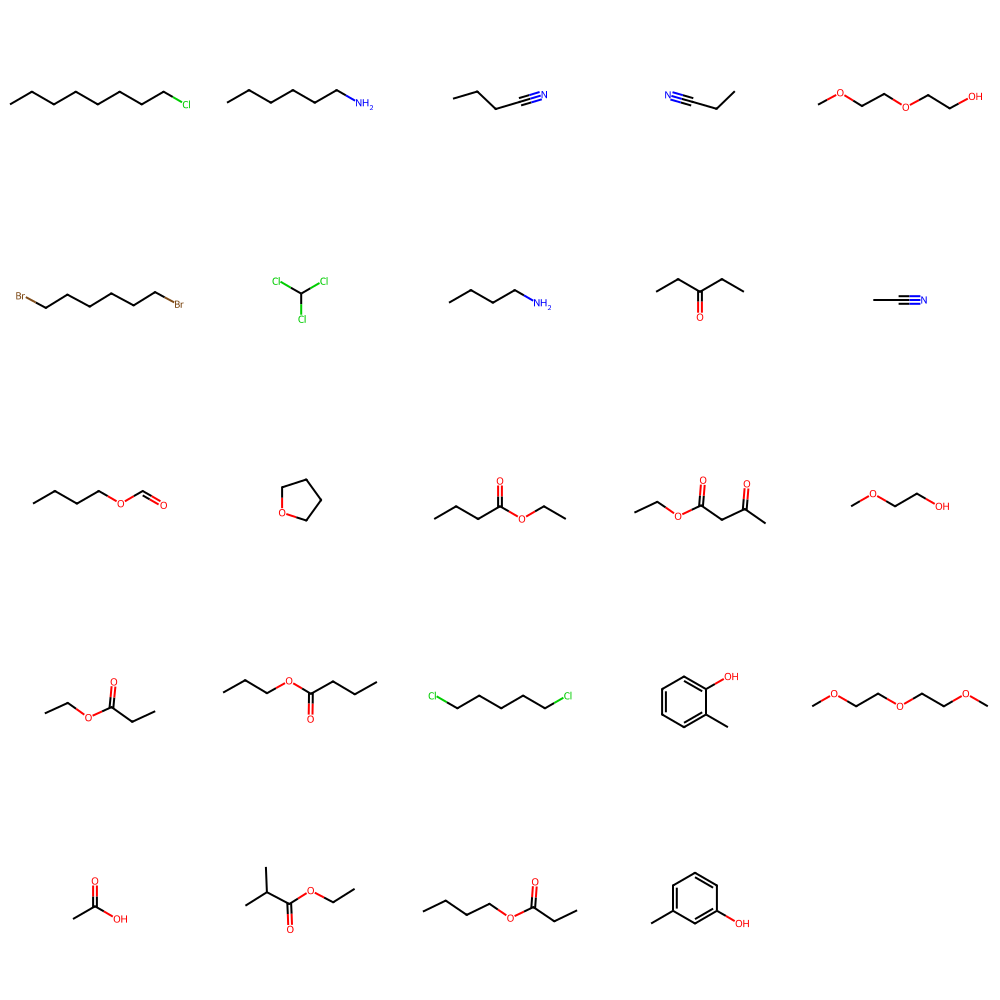

In [29]:
added_mols = [Chem.MolFromSmiles(x) for x in added_smiles]
Draw.MolsToGridImage(added_mols, molsPerRow=5, maxMols=len(added_mols))

In [32]:
removed_smiles = set(old_components) - set(components)
len(removed_smiles)

18

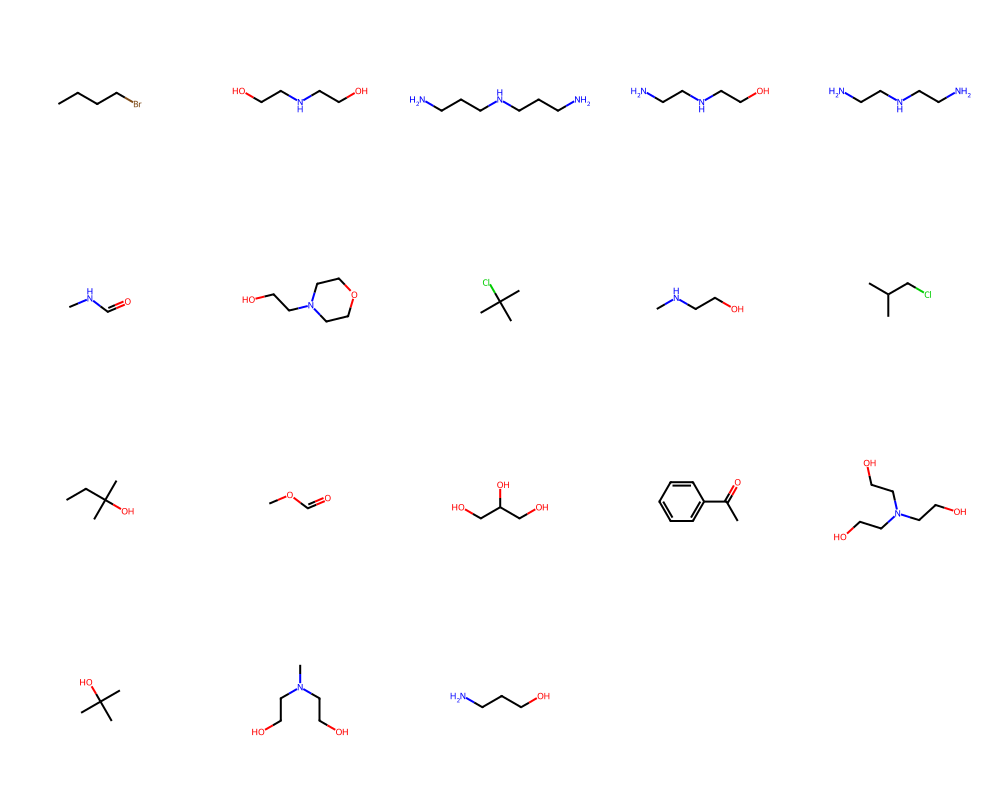

In [33]:
removed_mols = [Chem.MolFromSmiles(x) for x in removed_smiles]
Draw.MolsToGridImage(removed_mols, molsPerRow=5, maxMols=len(removed_mols))

In [22]:
def draw_group(group: str):
    nitriles = [k for k, v in components.items() if group in v]
    nitrile_rdmols = [Chem.MolFromSmiles(x) for x in nitriles]
    return Draw.MolsToGridImage(nitrile_rdmols, molsPerRow=len(nitrile_rdmols))

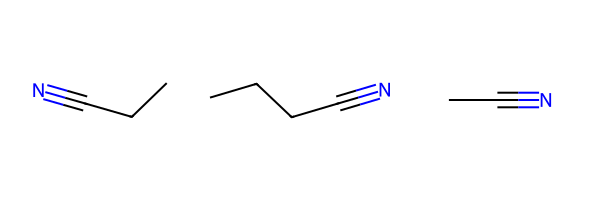

In [23]:
draw_group("Nitrile")